In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'..','..','..'))
from ursse.hydra_harp_file_reader import HydraHarpFile
from ursse.LED_tests.data_analyzis import calc_Fano, get_time_window_hist, calc_Fano_from_counts_per_time_window
import numpy as np
import pandas as pd
import seaborn as sns
from ursse.data_processing import \
    get_event_delays, plot_arrival_time_hist, get_events_array, get_fanos, \
    plot_fanos_hist, process_file, read_event_delays, save_event_delays
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import ursse.path_assistant as path_assistant
shift_02_28_2020 = path_assistant.PathAssistant('shift_02_28_2020', ignore_files=['background_000.ptu'])
shift_02_28_2020.show_time_stamp_file_names()
time_stamp_files_dir = shift_02_28_2020.get_time_stamp_files_dir()

0 34el_001.ptu
1 1el_000.ptu
2 1el_001.ptu
3 1el_002.ptu
4 2el_000.ptu
5 2el_001.ptu
6 3el_000.ptu
7 3el_001.ptu
8 4el_000.ptu
9 4el_001.ptu
10 5el_000.ptu
11 5el_001.ptu
12 11el_000.ptu
13 11el_001.ptu
14 34el_000.ptu


In [2]:
file_name = '1el_000.ptu'
df, n_revolutions = read_event_delays(shift_02_28_2020.get_time_stamp_file_path(file_name))
t_delays = df.delay

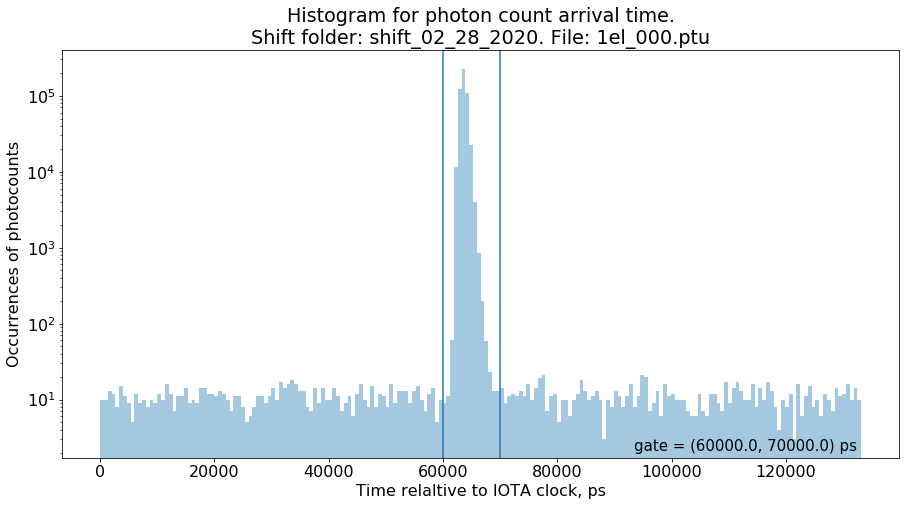

In [4]:
gate = (60000,70000)
plot_arrival_time_hist(t_delays, gate, bins=200, shift_folder_name=shift_02_28_2020.shift_folder_name,
    time_stamp_file_name=file_name)

In [5]:
events = get_events_array(df, n_revolutions, gate)
events

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [6]:
fanos, report = get_fanos(events, n_revolutions)

p_measured = 0.003296633982559815
chunck_length = 3000830
n_events = 494632
fano_interval = (-0.0033300786782309855, -0.0032481013586208585)
fano_interval_percentiles = (0.16, 0.84)
fano_median = -0.003306751798669294
fano_mean = -0.00329663459776145
absolute_fano_error = 4.09886598050635e-05


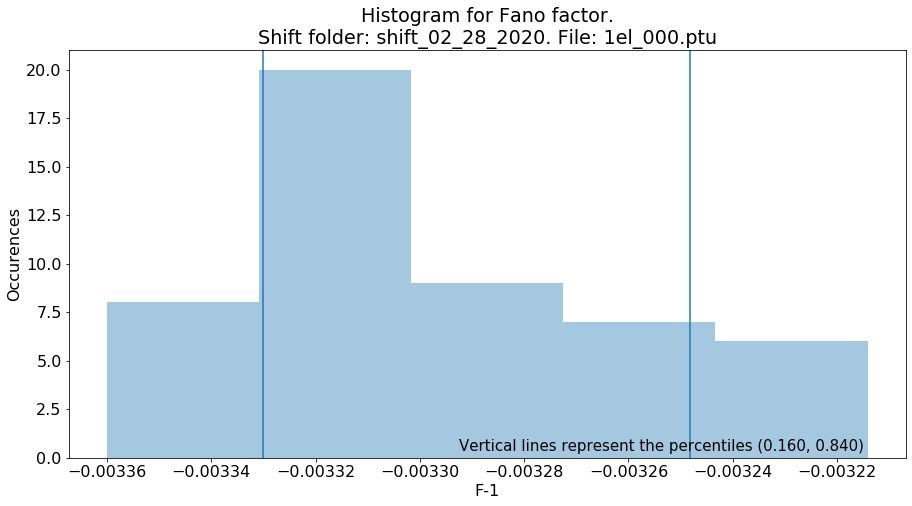

In [8]:
plot_fanos_hist(fanos, report, bins=5, shift_folder_name=shift_02_28_2020.shift_folder_name,
    time_stamp_file_name=file_name)

In [11]:
sum(fanos == np.nan)

0